# Get started with Qiskit-Qulacs primitives

The steps in this topic describes how to set up primitives, explore the options you can use to configure them, and invoke them in a program.

## Get started with Estimator

### 1. Create a circuit and an observable

You need at least one circuit and one observable as inputs to the `QulacsEstimator` primitive.

In [1]:
import numpy as np
from qiskit.circuit.library import IQP
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import SparsePauliOp, random_hermitian

n_qubits = 4

mat = np.real(random_hermitian(n_qubits, seed=1234))
circuit = IQP(mat)
observable = SparsePauliOp("Z" * n_qubits)
print(f">>> Observable: {observable.paulis}")

>>> Observable: ['ZZZZ']


The circuit and observable need to be transformed to only use instructions supported by the Qiskit-Qulacs. We'll use the transpiler to do this.

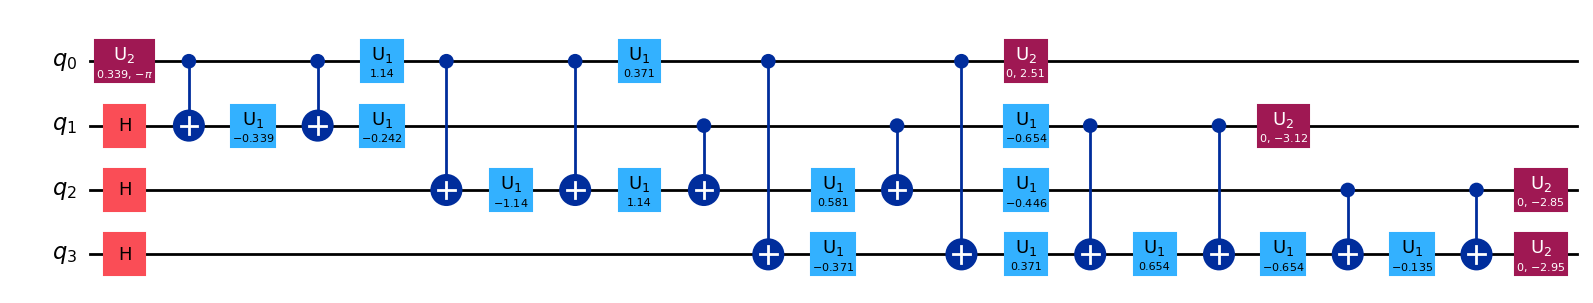

In [2]:
from qiskit_qulacs.qulacs_backend import QulacsBackend

backend = QulacsBackend()
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(circuit)
isa_observable = observable.apply_layout(isa_circuit.layout)
isa_circuit.draw("mpl")

### 2. Initialize Qulacs Estimator


In [3]:
from qiskit_qulacs.qulacs_estimator import QulacsEstimator

qulacs_estimator = QulacsEstimator()

### 3. Invoke the Estimator and get results

Next, invoke the `run()` method to calculate expectation values for the input circuits and observables.

In [4]:
job = qulacs_estimator.run(isa_circuit, isa_observable)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: 2e066dda-c6a3-48c4-85bb-d3f500f0ba6b
>>> Job Status: JobStatus.RUNNING


In [5]:
result = job.result()
print(f">>> {result}")
print(f"  > Expectation value: {result.values[0]}")
print(f"  > Metadata: {result.metadata[0]}")

>>> EstimatorResult(values=array([0.11963902]), metadata=[{'time_taken': 0.011379003524780273}])
  > Expectation value: 0.11963902390851683
  > Metadata: {'time_taken': 0.011379003524780273}


## Get started with Sampler

### 1. Create a circuit 

You need at least one circuit as input to the `QulacsSampler` primitive.

In [6]:
import numpy as np
from qiskit.circuit.library import IQP
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import SparsePauliOp, random_hermitian

n_qubits = 4

mat = np.real(random_hermitian(n_qubits, seed=1234))
circuit = IQP(mat)
circuit.measure_all()

Again, we use the transpiler to get an ISA circuit.

In [7]:
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(circuit)

### 2. Initialize Qulacs Sampler

In [8]:
from qiskit_qulacs.qulacs_sampler import QulacsSampler

qulacs_sampler = QulacsSampler()

### 3. Invoke the Sampler and get results

Next, invoke the `run()` method to generate the output.

In [9]:
job = qulacs_sampler.run(isa_circuit)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: 5dfae947-089a-4eef-ab05-fdcbc0824497
>>> Job Status: JobStatus.DONE


In [10]:
result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

>>> SamplerResult(quasi_dists=[{0: 0.26691002906348, 1: 0.091082530740366, 2: 0.026288965948886, 3: 0.138992040058161, 4: 0.187935658778179, 5: 0.103281433550316, 6: 0.005848264061641, 7: 0.044584460047673, 8: 0.023867479767147, 9: 0.008050154393833, 10: 0.018850760025519, 11: 0.020167397525843, 12: 0.003089727217012, 13: 0.017327173994654, 14: 0.028926821242992, 15: 0.014797103584296}], metadata=[{}])
  > Quasi-probability distribution: {0: 0.26691002906348, 1: 0.091082530740366, 2: 0.026288965948886, 3: 0.138992040058161, 4: 0.187935658778179, 5: 0.103281433550316, 6: 0.005848264061641, 7: 0.044584460047673, 8: 0.023867479767147, 9: 0.008050154393833, 10: 0.018850760025519, 11: 0.020167397525843, 12: 0.003089727217012, 13: 0.017327173994654, 14: 0.028926821242992, 15: 0.014797103584296}
  > Metadata: {}


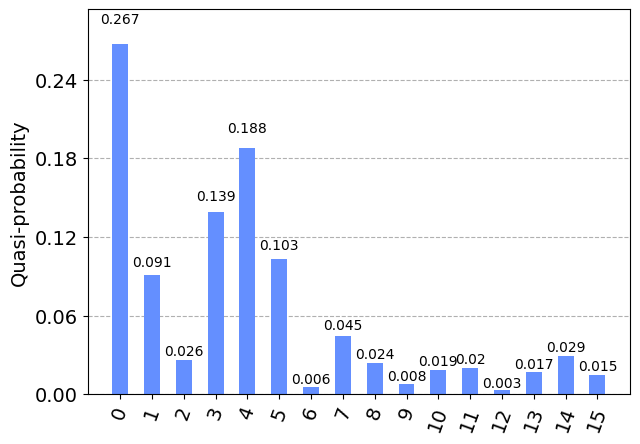

In [11]:
from qiskit.visualization import plot_histogram

plot_histogram(result.quasi_dists[0])

In [12]:
import qiskit

qiskit.__version__

'1.0.2'